#### Задание 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data =  boston['data']
feature_names = boston['feature_names']
target = boston['target']

In [6]:
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['price'])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
y_pred = lr.predict(X_test)

In [13]:
y_pred.shape

(152, 1)

In [14]:
check_frame = pd.DataFrame({
    'y_test': y_test['price'],
    'y_pred': y_pred.flatten()
})
check_frame.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [15]:
from sklearn.metrics import r2_score

In [16]:
R2 = r2_score(check_frame['y_test'], check_frame['y_pred'])
R2

0.711226005748496

#### Задание 2

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rfr = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=12)

In [19]:
model = rfr.fit(X_train, y_train.values[:,0])

In [20]:
y_pred_rfr = model.predict(X_test)

In [21]:
y_pred_rfr.shape

(152,)

In [22]:
check_frame_rfr = pd.DataFrame({
    'y_test': y_test['price'],
    'y_pred_rfr': y_pred_rfr   
})
check_frame_rfr.head(10)

,y_test,y_pred_rfr
173,23.6,22.588306
274,32.4,31.085184
491,13.6,16.381834
72,22.8,23.834133
452,16.1,17.108917
76,20.0,21.701187
316,17.8,19.796149
140,14.0,14.901899
471,19.6,21.205501
500,16.8,20.759746


In [23]:
R2_rfr = r2_score(check_frame_rfr['y_test'], check_frame_rfr['y_pred_rfr'])
R2_rfr

0.8761734192709574

In [24]:
# чем ближе r2_score к 1, тем лучше

#### Задание 3*

In [25]:
?RandomForestRegressor

In [26]:
rfr.feature_importances_.sum()

1.0

In [27]:
features_table = pd.DataFrame({
    'feature name': feature_names,
    'importance': rfr.feature_importances_
})
features_table.sort_values('importance', ascending=False).head(2)

,feature name,importance
12,LSTAT,0.409098
5,RM,0.405775


#### Задание 4*

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [29]:
df = pd.read_csv('./creditcard.csv')

In [30]:
df['Class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [32]:
pd.options.display.max_columns = 100

In [33]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [34]:
X = df.drop('Class', axis=1)
X.keys()

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

In [35]:
y = df['Class']
type(y)

pandas.core.series.Series

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [37]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(199364, 30)
(85443, 30)
(199364,)
(85443,)


In [38]:
parameters = [{'n_estimators': [10, 15],
'max_features': np.arange(3, 5),
'max_depth': np.arange(4, 7)}]

In [39]:
clf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=100),
    param_grid=parameters,
    scoring='roc_auc',
    cv=3
)

In [40]:
clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=100,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[

In [41]:
clf.best_params_

{'max_depth': 6, 'max_features': 3, 'n_estimators': 15}

In [42]:
y_pred_proba = clf.predict_proba(X_test)[:,1]
y_pred_clf = clf.predict(X_test)

In [43]:
from sklearn.metrics import roc_auc_score

In [67]:
roc_auc_score(y_test, y_pred_proba)

0.9462664156037156

In [68]:
# Вычислите AUC на тестовых данных и сравните с результатом,полученным на тренировочных данных, используя в качестве аргументовмассивы y_test и y_pred_proba.
# запутался на данном этапе, не понял что с чем мне нужно сравнить.

#### доп 

In [45]:
from sklearn.datasets import load_wine

In [46]:
data = load_wine()

In [47]:
type(data)

sklearn.utils.Bunch

In [48]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [49]:
#print(data['DESCR'])

In [50]:
np.unique(data['target'])

array([0, 1, 2])

In [51]:
print(data['target_names'])

['class_0' 'class_1' 'class_2']


In [52]:
data['data'].shape

(178, 13)

In [53]:
len(data['feature_names'])

13

In [54]:
X = pd.DataFrame(data['data'], columns=data['feature_names'])

In [55]:
#X.describe()

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
alcohol                         178 non-null float64
malic_acid                      178 non-null float64
ash                             178 non-null float64
alcalinity_of_ash               178 non-null float64
magnesium                       178 non-null float64
total_phenols                   178 non-null float64
flavanoids                      178 non-null float64
nonflavanoid_phenols            178 non-null float64
proanthocyanins                 178 non-null float64
color_intensity                 178 non-null float64
hue                             178 non-null float64
od280/od315_of_diluted_wines    178 non-null float64
proline                         178 non-null float64
dtypes: float64(13)
memory usage: 18.2 KB


In [57]:
X['target']=data['target']

In [58]:
X_corr = X.corr()

In [59]:
high_corr = X_corr['target'][(np.abs(X_corr['target']) > 0.5) & (X_corr['target'].index != 'target')]
high_corr

alcalinity_of_ash               0.517859
total_phenols                  -0.719163
flavanoids                     -0.847498
hue                            -0.617369
od280/od315_of_diluted_wines   -0.788230
proline                        -0.633717
Name: target, dtype: float64

In [60]:
X1 = X.copy()

In [61]:
#high_corr.keys()[0]
for i in range(len(high_corr)):
    X1[high_corr.keys()[i]+'_2'] = X1[high_corr.keys()[i]] + high_corr[i]**2

In [62]:
X1.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target,alcalinity_of_ash_2,total_phenols_2,flavanoids_2,hue_2,od280/od315_of_diluted_wines_2,proline_2
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202,19.763122,2.812308,2.747522,1.338594,3.232991,747.294855
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035,3.339564,0.625851,0.998859,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000,10.868178,1.497196,1.058252,0.861145,1.891306,278.401597
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000,17.468178,2.259696,1.923252,1.163645,2.558806,500.901597
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000,19.768178,2.872196,2.853252,1.346145,3.401306,673.901597
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000,21.768178,3.317196,3.593252,1.501145,3.791306,985.401597
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000,30.268178,4.397196,5.798252,2.091145,4.621306,1680.401597


In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

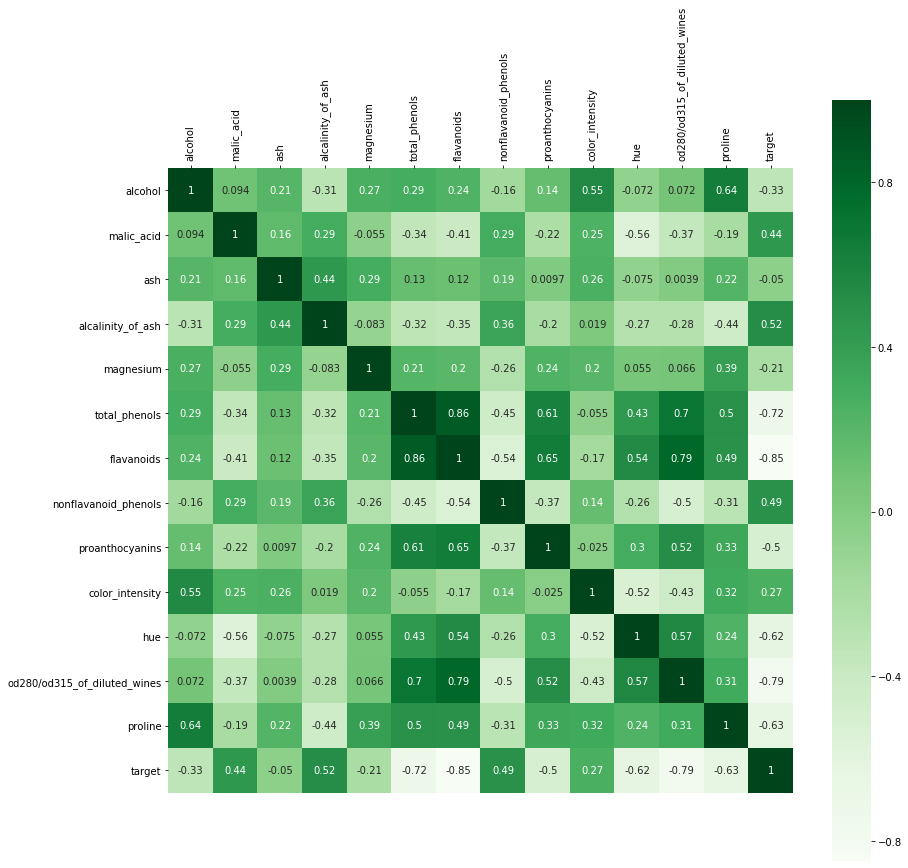

In [64]:
plt.figure(figsize=(14,14), )
ax = sns.heatmap(X_corr, vmax=1, cmap='Greens', square=True, annot=True)
ax.xaxis.tick_top()
plt.xticks(rotation=90)
plt.show()